## Séances 6 : Bibliothèques SymPy et Scipy

<span style= font-size:16px> Maintenant que nous avons vu les bibliothèques classiques **Numpy** et **Matplotlib** nous allons en voir deux nouvelles plus spécifiques aux calculs. Verifiez que ces deux bibliothèques sont bien installés dans vos applications Anaconda et importez les dans ce terminale comme nous en avons l'habitude. 

In [4]:
# Importer les modules sympy et scipy 
import scipy as sc
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

<span style= font-size:16px>Le premier module que nous allons utiliser est le module **`sympy`**. Cette bibliotheque permet de faire du calcul Symbolique et surtout trés precis mathematiquement. Cette bibliotheque permet egalement de faire du calcul matriciel, de calculer des dérivés et integrale et plein d'autres merveilles que nous aurons l'occasion de voir par la suite. 

<span style= font-size:16px>Commencons par le début faites les calculs suivant à la fois avec sympy et le module math ou numpy. 
    $$\large1.\;\sqrt{4}$$ 
    $$\large2.\;\sqrt{2}$$ 
    $$\large3.\;\sqrt{8}$$
    $$\large$$
    $$\large4.\;\;e^4*e^3$$

In [7]:
# Resultat exercice 1 :
variable = 4
print(f"Racine de {variable} avec numpy : {np.sqrt(variable)} et avec sympy : {sp.sqrt(variable)}")

Racine de 4 avec numpy : 2.0 et avec sympy : 2


In [8]:
variable = 2
print(f"Racine de {variable} avec numpy : {np.sqrt(variable)} et avec sympy : {sp.sqrt(variable)}")

Racine de 2 avec numpy : 1.4142135623730951 et avec sympy : sqrt(2)


In [9]:
variable = 8
print(f"Racine de {variable} avec numpy : {np.sqrt(variable)} et avec sympy : {sp.sqrt(variable)}")

Racine de 8 avec numpy : 2.8284271247461903 et avec sympy : 2*sqrt(2)


In [10]:
print(f"Avec numpy : {np.exp(4)*np.exp(3)} et avec sympy : {sp.exp(4)*sp.exp(3)}")

Avec numpy : 1096.6331584284585 et avec sympy : exp(7)


In [12]:
numpy1 = np.sqrt(2)
sympy1 = sp.sqrt(2)

In [13]:
print(f"Carré de {numpy1} est {numpy1**2} et le carré de {sympy1} avec sympy est : {sympy1**2}")
# On peut voir ici que Sympy n'arrondi pas les resultats et mais conserve la valeur exacte. 
# De plus comme nous l'avons vu juste avant Sympy se charge de simplifier les resultats et expressions 


Carré de 1.4142135623730951 est 2.0000000000000004 et le carré de sqrt(2) avec sympy est : 2


In [14]:
sympy2 = sp.sqrt(8)
sp.pprint(sympy2)


2⋅√2


<span style= font-size:16px> Maintenant que nous avons compris ce que signifie cette notion de calcul Symbolique, regardons le vrai interet de **`Sympy`**.


In [13]:
print(sp.latex(sp.sqrt(2))) # ici la fonction sp.latex permet de traduire en latex directement les expressions Python 

\sqrt{2}


$$\sqrt{2}$$

In [17]:
# Sympy permets de definir des expressions en utilisant des variables python comme des symboles
x, y = sp.symbols("x y") # Ici x et y sont varibles définie comme des symboles sympy
expr = x + 2*y
print(expr) 

# expr est une expression mathematiques combosé de symboles, comme on le voit assez bien ici, Python ne s'attend pas a recevoir une valeur pour x et y mais les variables seront utilisés comme telle. 

x + 2*y


In [22]:
expr2 = x**2 + x*5 + 3 
sp.pprint(expr2) 

 2          
x  + 5⋅x + 3


In [19]:
der_expr2 = sp.Derivative(expr2, x) # Derivative est une class Python de sympy qui permet de prendre la derivée d'une expression sympy
sp.pprint(der_expr2)

d ⎛ 2          ⎞
──⎝x  + 5⋅x + 3⎠
dx              


In [26]:
expr3 = der_expr2.doit() # Si on ajoute à l'expression derivative de sympy la fonction "doit" on lui demande de calculer la derivée de l'expression
expr3

2*x + 5

In [23]:
expr3.subs(x,3) # Ici avec la fonction subs permet de substituer un symbol par une valeur numerique, On vient remplacer x par 3

11

In [35]:
# Grace à sympy on peut egalement venir resoudre des equations. Pour ce faire il faut definir une equation avec les deux membres
# ici on a x**2 + 5*x +3 = 0 
eq1 = sp.Eq(expr2, 0)
sol1, sol2 = sp.solve(eq1, x) # # Avec solve on précise l'equation que l'on souhaite resoudre et la variable selon laquelle on souhaite le faire 
print(f"Les solutions de {expr2} sont : {sol1} et {sol2}")

Les solutions de x**2 + 5*x + 3 sont : -5/2 - sqrt(13)/2 et -5/2 + sqrt(13)/2


<span style= font-size:16px>trouver les integrales des fonctions suivantes:
        $$\large-\frac{d[A]}{dt}=k$$
    $$\large-\frac{d[A]}{dt}=k[A]$$

In [55]:
A, t, k = sp.symbols("A, t, k")
equation1 = sp.integrate(-k, t)

equation2 = sp.integrate(-k*A, t)

In [56]:
print(f"La solution de l'equation 1 est : {equation1}")
print(f"La solution de l'equation 2 est : {equation2}")

La solution de l'equation 1 est : -k*t
La solution de l'equation 2 est : -A*k*t


La librairie `Scipy` est entierement dédiée aux études et calculs scientifiques. Son  nom est justement la contraction de Scientific Python d'ou Scipy. 

Son objectif premier et de simplifier les calculs scientifiques comme les integrations numériques d'équations différentielles. Cette librairie offre égéalement la possibilité de filter les signaux physiologiques ou elecrophysiologiques (FMRI, EEG, Neuron recordings …). 

Enfin cette librairie permet de réaliser toute sorte d'analyse sur les données, comme par exemple des tests statistiques ou des analyses de Fourier. En d'autre termes Python vous propose tout un tas d'outils d'analyse vous permettant de faire des analysis statistiques à la maniere de R et bien plus encore. Libre à vous d'aller explorer !

In [1]:
from scipy.integrate import solve_ivp, odeint # solve_ivp et odeint sont des fonctions de scipy permettant d'integreter numériquement des equations differentielles.

# Nous avons comment le faire à la main à la séance dernière et de façon symbolique juste avant, mais il existe un moyen encore plus efficace de le faire grace à scipy. 
# Petite précisions solve-ivp et odeint fonctionne de façon similaire simplement odeint et l'ancienne implementation. Il est d'avantage conseillé d'utiliser solve-ivp

In [2]:
def func(x, t): # La fonction "func" ici est celle a integrer. Elle ne comporte que l'expression de l'equation dif.  
    d_dx = x**2 + 2
    return d_dx 
# Attention il est essentile de mettre une variable "t" non utiliser dans fonction pour que solve-ivp marche

In [6]:
sol = solve_ivp(func, [-200, 200], [2], t_eval = np.linspace(-100,100, 10000)) # Ici nous venons integrer entre -200 et 200 mais plus précisement sur chacun de point deu np.linspace.

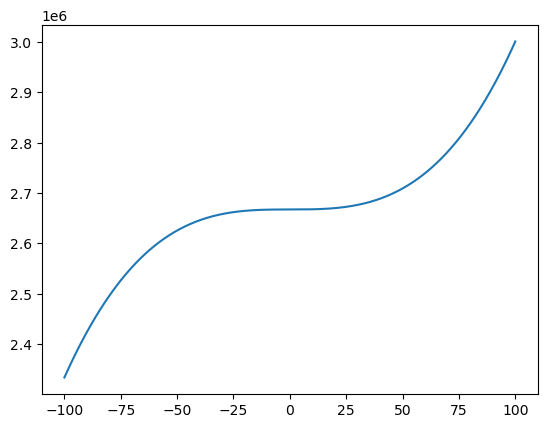

In [62]:
plt.plot(sol.t, sol.y.T) # On recupere dans sol avec t les pas sur lesquelles est integrée l'equation et les valeurs numériques avec y

In [13]:
def half_har_osc(t, y, w):
    x = y
    return  - w**2*x

def full_har_osc(t, y, w):
    x, dx = y
    return  dx, - w**2 * x

In [14]:
half_sol = solve_ivp(half_har_osc, [-200, 200], y0=[2], t_eval=np.arange(0, 15, 0.1), args = [1], method="RK23") # args défini la valeur de w

full_sol = solve_ivp(full_har_osc, [-200, 200], y0=[2,0], t_eval=np.arange(0, 15, 0.1), args = [1], method="RK23")

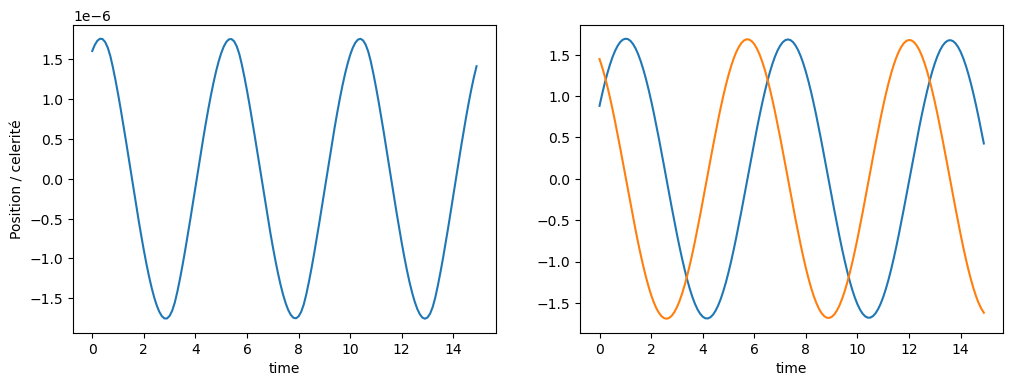

In [16]:
fig, ax  = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(half_sol.t, half_sol.y.T, label = "hal oscillator, only vélocity")
ax[1].plot(full_sol.t, full_sol.y.T, label = "Full oscillator, both vélocity and position")
ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[0].set_ylabel("Position / celerité")
plt.show()